In [1]:
import time
import warnings

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from typing import Callable, Union

warnings.filterwarnings("ignore")

In [2]:
def rosenbrock(X, return_derivatives: bool = True):
    x1, x2 = X
    f = 100 * (x2 - x1**2)**2 + (1 - x1)**2

    if return_derivatives:
        df = np.array([-400*x1*(x2 - x1**2) + 2 * x1 - 2, 200*(x2 - x1 ** 2)])
        ddf = np.array([[1200*x1 ** 2 - 400*x2+2, -400*x1],[-400*x1,200*np.ones_like(x1)]])
        return f, df, ddf
    return f

In [3]:
def contour(xlim: Union[np.array, list], ylim: Union[np.array, list], points: int, levels: int, log: bool = False, ax = None):
    x = np.linspace(xlim[0], xlim[1], 1000)
    y = np.linspace(ylim[0], ylim[1], 1000)

    X, Y = np.meshgrid(x, y)
    Z, _, _ = rosenbrock([X, Y], return_derivatives=True)
    if ax is None:
        plt.contourf(X, Y, Z, levels=levels) if not log else plt.contourf(X,Y,np.log(Z), levels=levels)
        plt.scatter([1], [1], color="red")
        plt.colorbar()
    else:
        ax.contourf(X, Y, Z, levels=levels) if not log else ax.contourf(X,Y,np.log(Z), levels=levels)

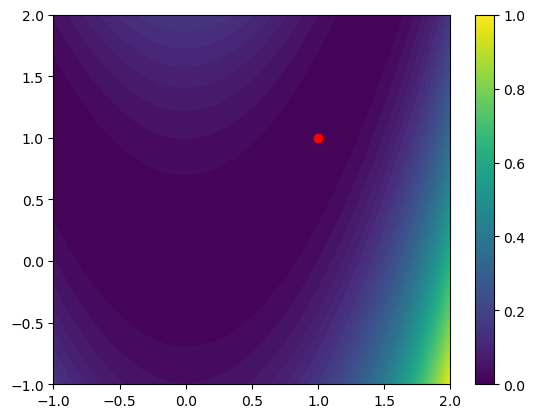

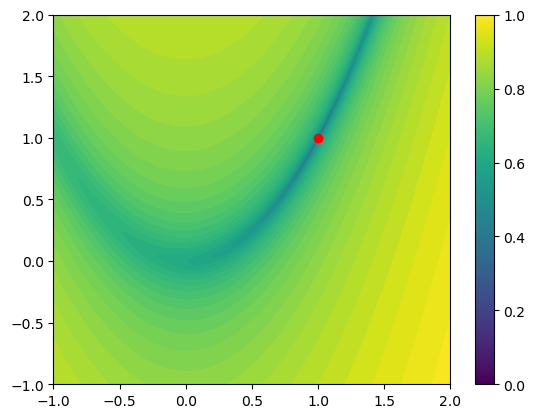

In [4]:
contour(xlim=[-1, 2], ylim=[-1, 2], points=1000, levels=50, log=False)
plt.show()
contour(xlim=[-1, 2], ylim=[-1, 2], points=1000, levels=50, log=True)
plt.show()

In [5]:
def steepest_descent(alpha: float, func: Callable, x0: Union[float, np.array], backtrack: bool = False, **kwargs):
    if kwargs.get("tol") != None:
        tol = kwargs["tol"]

    if kwargs.get("max_iter") != None:
        max_iter = kwargs["max_iter"]
    xstar = np.array([1,1])
    if backtrack:
        c = 0.8
        rho = 0.5

    x = np.array(x0)

    stats = {'k': [0], 'fxk': [func(x)[0]], 'ek': [np.linalg.norm(xstar - x)], 'alphak': [alpha], 'xk': [x], 'x_star': 0}

    for i in range(max_iter):
        pk = -func(x)[1]/np.linalg.norm(func(x)[1])

        if backtrack:
            alpha = 1
            while func(x + alpha*pk)[0] > (func(x)[0] + c * alpha * func(x)[1] @ pk):
                alpha *= rho


        x = x - alpha*(func(x)[1]/np.linalg.norm(func(x)[1]))
        stats['k'].append(i+1)
        stats['fxk'].append(func(x)[0])
        stats['ek'].append(np.linalg.norm(xstar - x))
        stats['alphak'].append(alpha)
        stats['xk'].append(x)
        if np.linalg.norm(func(x)[1]) < tol:
            stats["x_star"] = x
            print("Converged!")
            break

    if stats["x_star"] == 0:
        print("Didn't converge!")
        stats["x_star"] = stats["xk"][-1]
    return stats

Didn't converge!


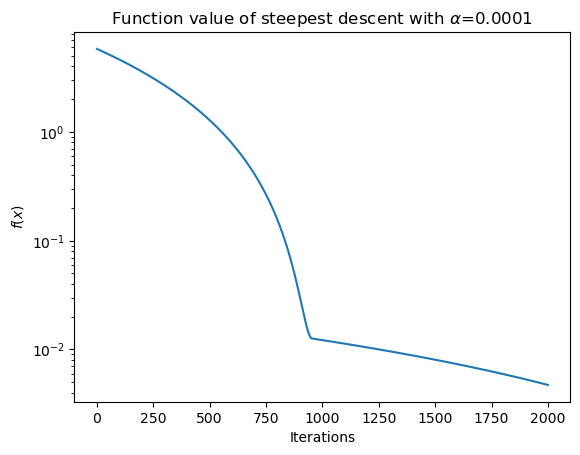

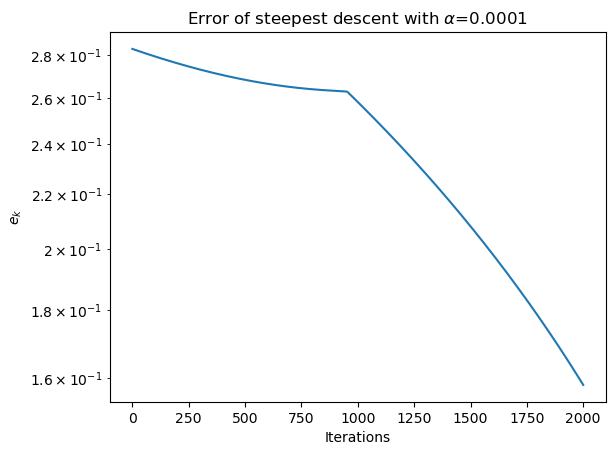

Didn't converge!


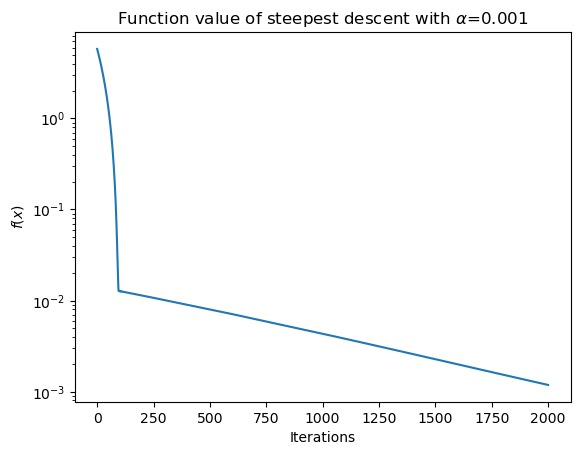

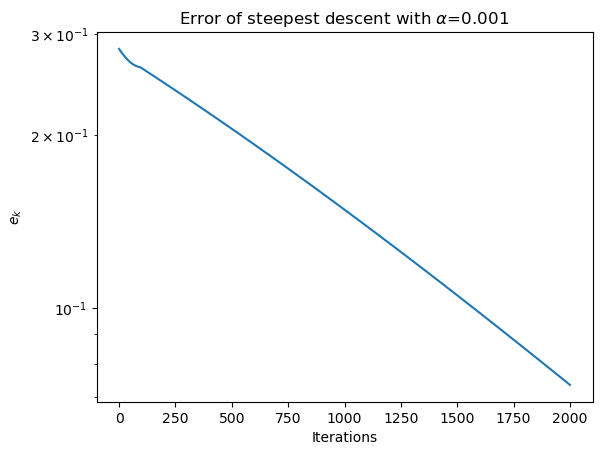

Didn't converge!


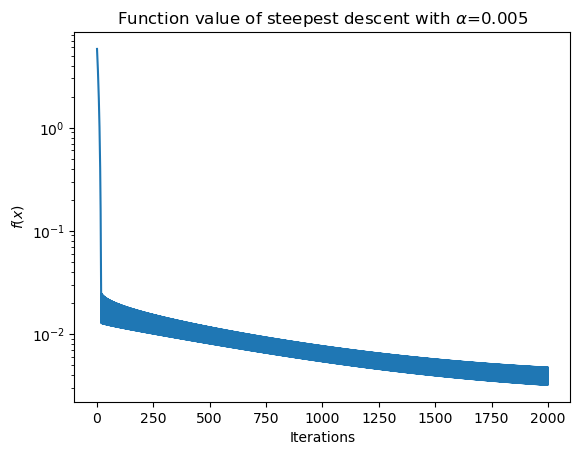

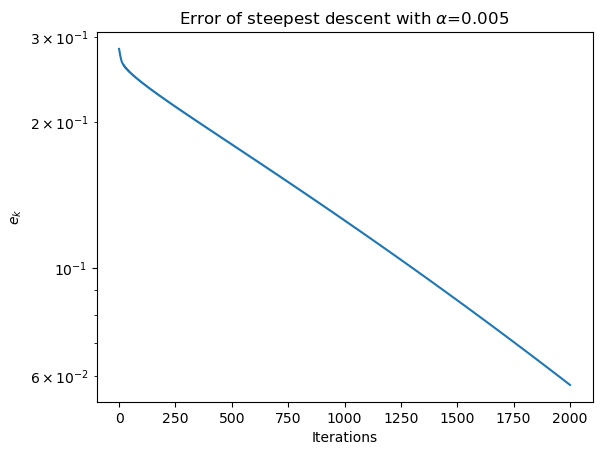

Didn't converge!


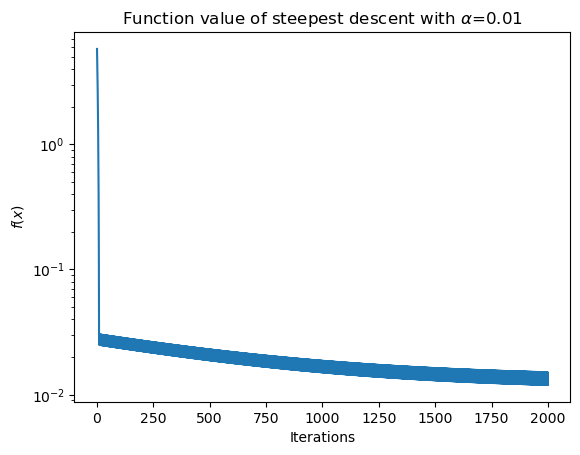

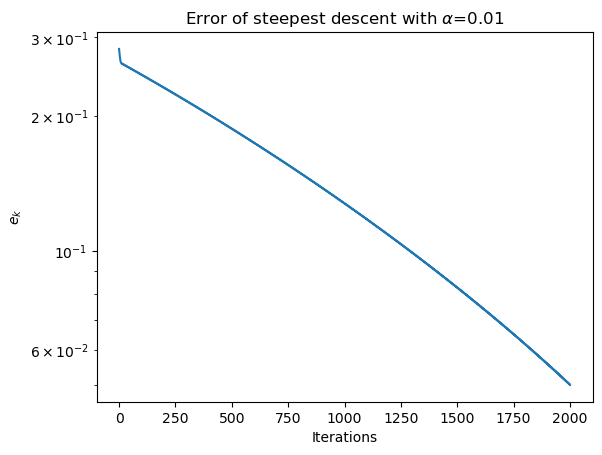

Didn't converge!


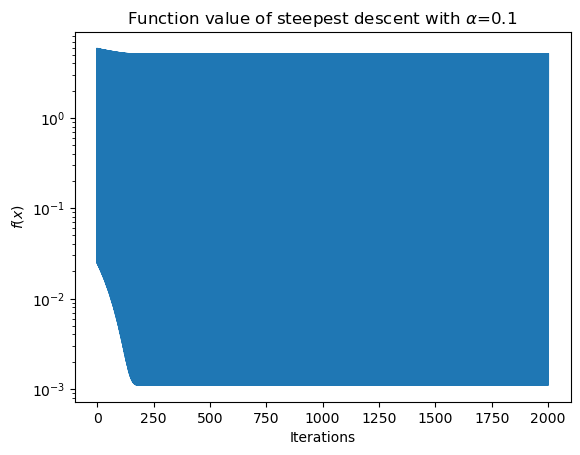

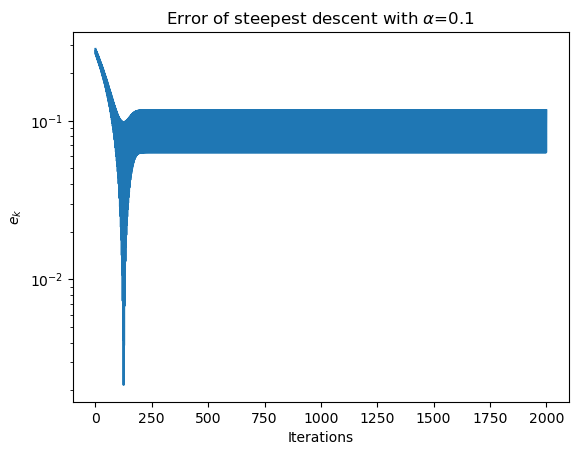

In [6]:
# Steepest descent no backtracking. Starting point x0 = [1.2,1.2]
tol = 1e-10
step_sizes = [0.0001, 0.001, 0.005, 0.01, 0.1]
for step_size in step_sizes:
    x0 = np.array([1.2, 1.2])
    stats = steepest_descent(step_size, rosenbrock, x0, backtrack=False, max_iter=2000, tol=10e-10)
    plt.semilogy(range(len(stats["k"])), stats["fxk"])
    plt.title(fr"Function value of steepest descent with $\alpha$={step_size}")
    plt.ylabel("$f(x)$")
    plt.xlabel("Iterations")
    plt.show()
    
    
    plt.semilogy(range(len(stats["k"])), stats["ek"])
    plt.title(fr"Error of steepest descent with $\alpha$={step_size}")
    plt.ylabel("$e_k$")
    plt.xlabel("Iterations")
    plt.yscale("log")
    plt.show()
    plt.close()

Didn't converge!


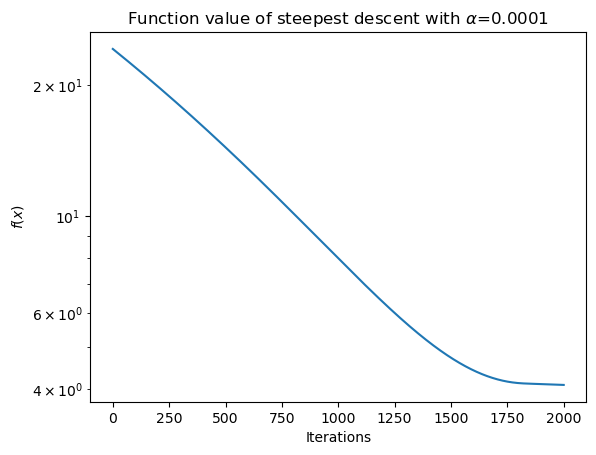

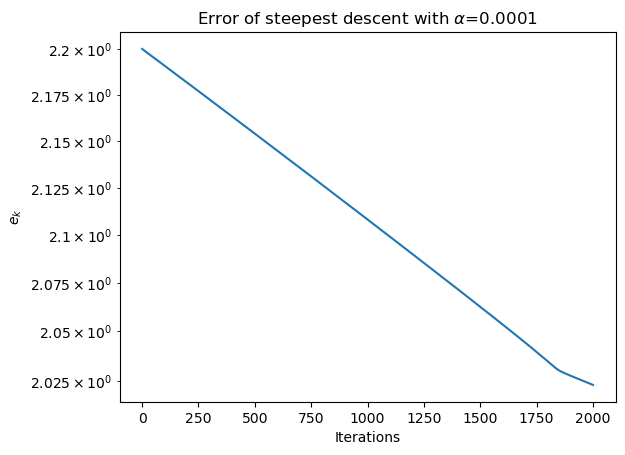

Didn't converge!


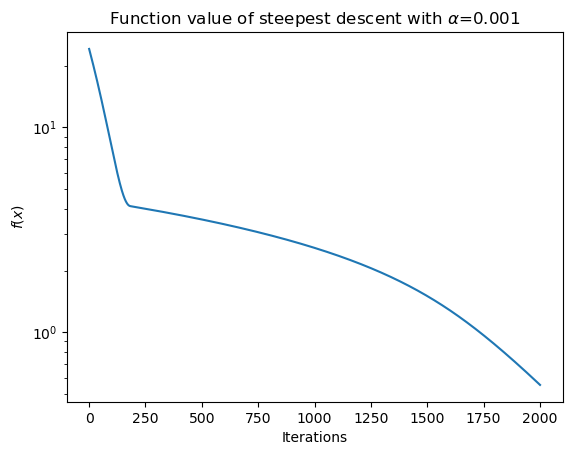

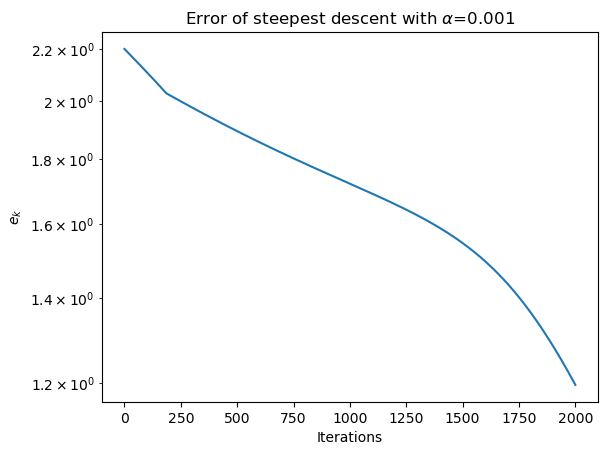

Didn't converge!


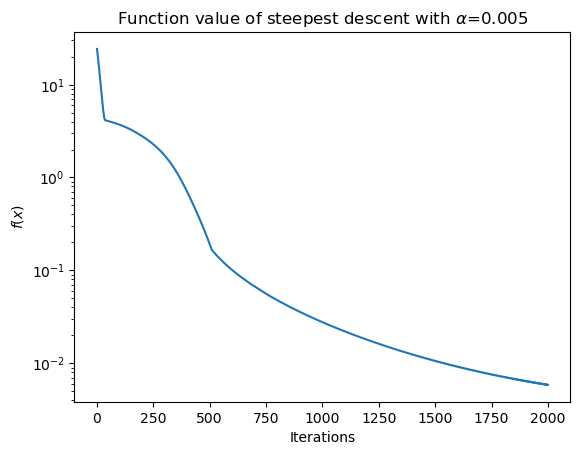

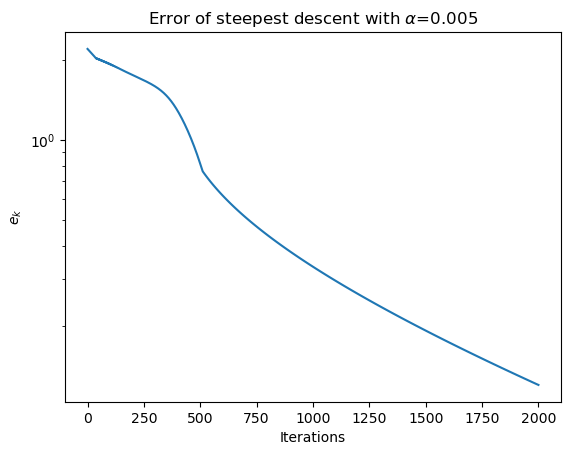

Didn't converge!


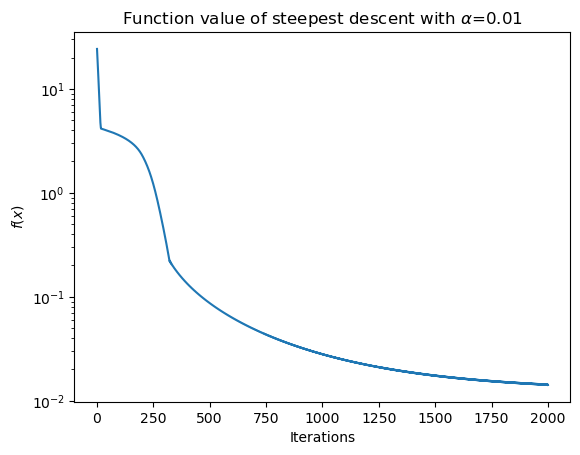

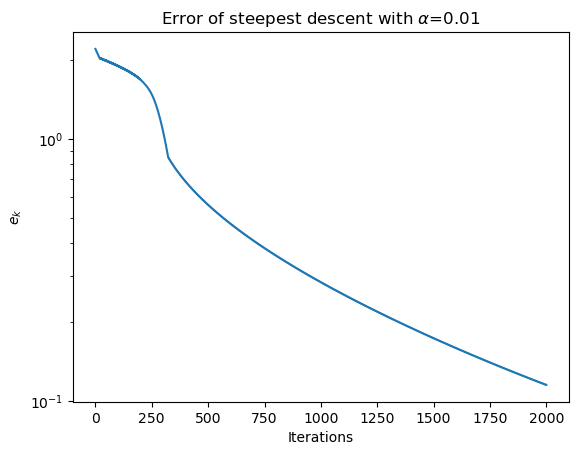

Didn't converge!


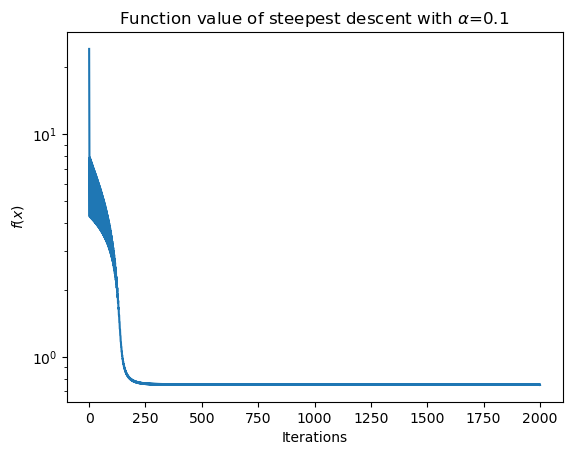

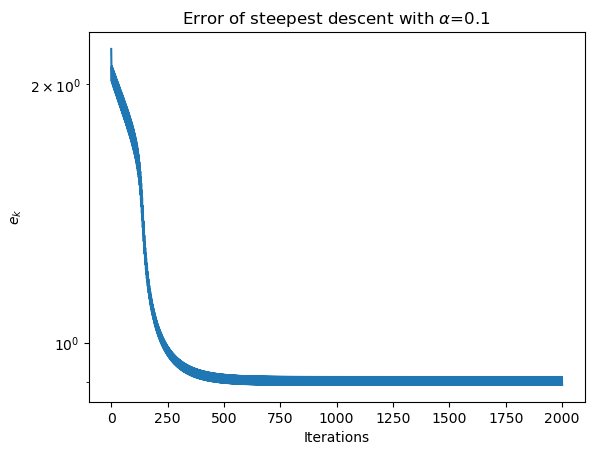

In [7]:
# Steepest descent no backtracking. Starting point x0 = [-1.2,1]
tol = 1e-10
step_sizes = [0.0001, 0.001, 0.005, 0.01, 0.1]
for step_size in step_sizes:
    x0 = np.array([-1.2, 1])
    stats = steepest_descent(step_size, rosenbrock, x0, backtrack=False, max_iter=2000, tol=10e-10)
    plt.semilogy(range(len(stats["k"])), stats["fxk"])
    plt.title(fr"Function value of steepest descent with $\alpha$={step_size}")
    plt.ylabel("$f(x)$")
    plt.xlabel("Iterations")
    plt.show()
    
    
    plt.semilogy(range(len(stats["k"])), stats["ek"])
    plt.title(fr"Error of steepest descent with $\alpha$={step_size}")
    plt.ylabel("$e_k$")
    plt.xlabel("Iterations")
    plt.yscale("log")
    plt.show()
    plt.close()

Didn't converge!


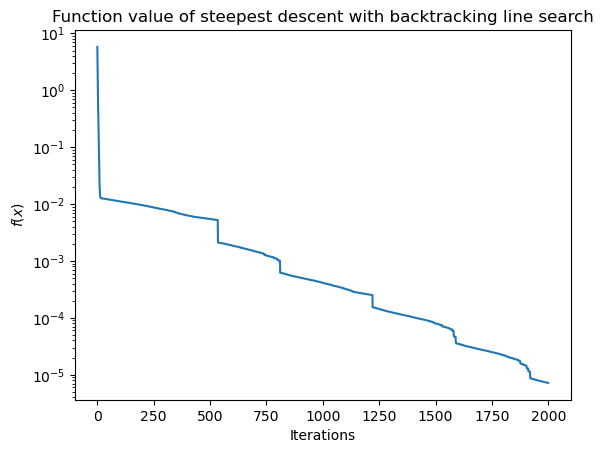

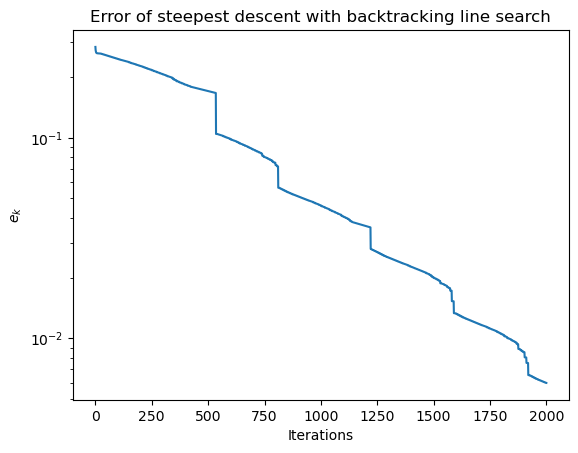

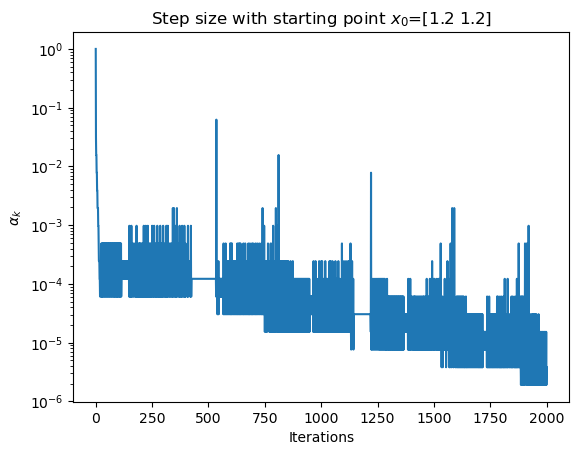

Didn't converge!


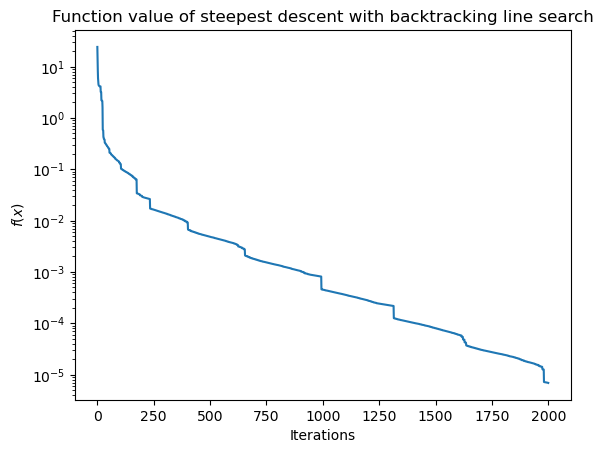

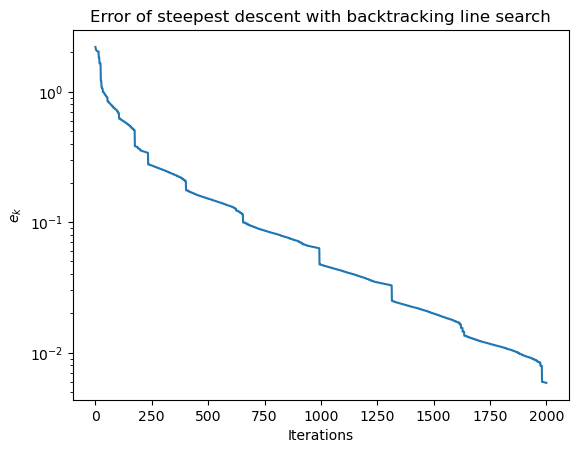

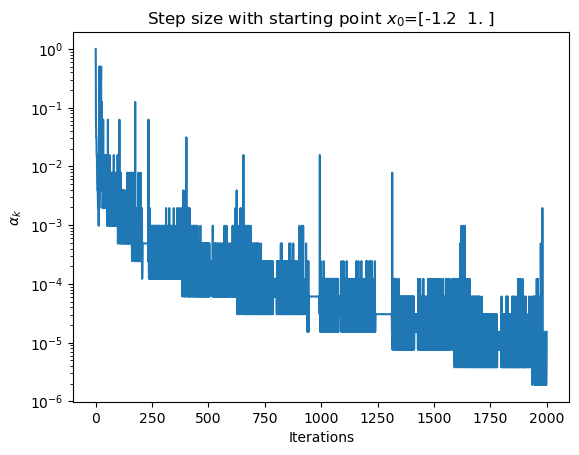

In [8]:
x0s = np.array([[1.2,1.2], [-1.2, 1]])
for x0 in x0s:
    stats = steepest_descent(alpha=1, func=rosenbrock, x0=x0, backtrack=True, max_iter=2000, tol=10e-10)
    plt.semilogy(range(len(stats["k"])), stats["fxk"])
    plt.title(fr"Function value of steepest descent with backtracking line search")
    plt.ylabel("$f(x)$")
    plt.xlabel("Iterations")
    plt.show()
    
    
    plt.semilogy(range(len(stats["k"])), stats["ek"])
    plt.title(fr"Error of steepest descent with backtracking line search")
    plt.ylabel("$e_k$")
    plt.xlabel("Iterations")
    plt.yscale("log")
    plt.show()
    plt.close()

    plt.semilogy(range(len(stats["k"])), stats["alphak"])
    plt.title(fr"Step size with starting point $x_0$={x0}")
    plt.ylabel(r"$\alpha_k$")
    plt.xlabel("Iterations")
    plt.yscale("log")
    plt.show()
    plt.close()

In [9]:
def newton_md(alpha: float, func: Callable, x0: Union[list, np.array], **kwargs):
    x_star = np.array([1,1])
    if kwargs.get("tol") != None:
        tol = kwargs["tol"]
    else:
        tol = 1e-10

    if kwargs.get("max_iter") != None:
        max_iter = kwargs["max_iter"]
    else:
        max_iter = 2000


    x = x0
    it = 0
    f, df, d2f = func(x)
    converged = (np.linalg.norm(df, np.inf) <= tol)

    # Store data for plotting
    stat = {'X': [x], 'F': [f], 'dF': [df], 'converged': converged, 'nfun': 1, 'iter': it, "e": [np.linalg.norm(x-x_star)]}

    # Main loop of Newton's method
    while not converged and (it < max_iter):
        it += 1

        p = - np.linalg.solve(d2f, df)
        x = x + alpha * p

        f, df, d2f = func(x)
        converged = (np.linalg.norm(df, np.inf) <= tol)
        stat['nfun'] += 1

        # Store data for plotting
        stat['X'].append(x)
        stat['F'].append(f)
        stat['dF'].append(df)
        stat["e"].append(np.linalg.norm(x-x_star))

    # Prepare return data
    if not converged:
        x = None
    stat['converged'] = converged
    stat['iter'] = it

    return x, stat

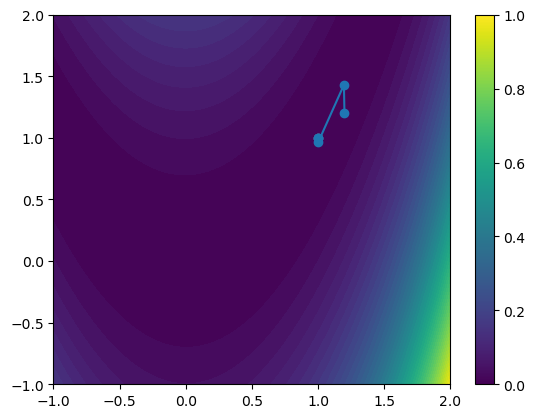

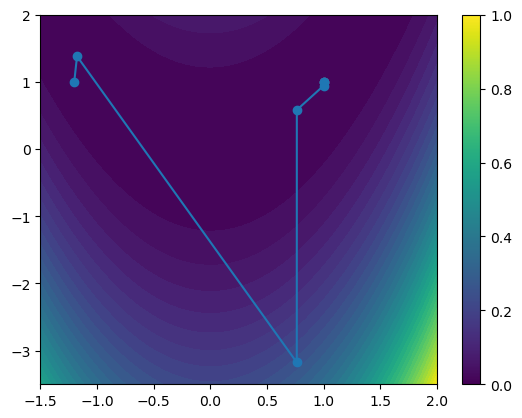

In [10]:
x, stats = newton_md(1, rosenbrock, np.array([1.2,1.2]), max_iter=2000, tol=1e-10)

contour([-1, 2], [-1,2], 1000, 50, log=False)
plt.scatter(np.array(stats["X"])[:, 0], np.array(stats["X"])[:, 1])
plt.plot(np.array(stats["X"])[:, 0], np.array(stats["X"])[:, 1])
plt.show()

x, stats = newton_md(1, rosenbrock, np.array([-1.2, 1]), max_iter=2000, tol=1e-10)

contour([-1.5, 2], [-3.5,2], 1000, 50, log=False)
plt.scatter(np.array(stats["X"])[:, 0], np.array(stats["X"])[:, 1])
plt.plot(np.array(stats["X"])[:, 0], np.array(stats["X"])[:, 1])
plt.show()

In [ ]:
rosenbrock_lambda = lambda x: 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
rosenbrock_grad_lambda = lambda x: np.array([-400*x[0]*(x[1] - x[0]**2) + 2 * x[0] - 2, 200*(x[1] - x[0] ** 2)])

def BFGS_line(x0: np.array, func: Callable, grad_f: Callable, iterations: int, **kwargs):
    """
    function must return (function value, gradient, hessian)
    """
    H = np.eye(len(x0))
    I = np.eye(len(x0))
    
    grad = grad_f(x0)
    
    x = x0
    
    xs = [x]
    ys = [func(x)]
    
    errors = [np.linalg.norm(x-kwargs["x_star"])]
    
    for k in range(iterations):
        grad = grad_f(x)
        
        
        p = -H @ grad
        
        
        alpha = backtrack(x, func, grad, p)
        
        next_x = x + alpha * p
        s = next_x - x
        y = grad_f(next_x) - grad
        
        if np.linalg.norm(grad, np.inf) <= kwargs["tol"]:
            break

        rho = 1 / np.dot(y, s)
        
        A = I - rho * np.outer(s, y)
        B = I - rho * np.outer(y, s)
        
        H = A @ H @ B + rho * np.outer(s, s)
        
        x = next_x
        
        xs.append(x)
        ys.append(func(x))
        errors.append(np.linalg.norm(x-kwargs["x_star"]))
    
    return xs, ys, errors
        
def backtrack(x, f, df, direction):
    alpha = 0.1
    c = 0.5
    rho = 0.8
    while f(x + alpha*direction) > (f(x) + c * alpha * df @ direction):
        alpha *= rho
    return alpha

x0 = np.array([1.2,1.2])
x, y, e = BFGS_line(x0, func=rosenbrock_lambda, grad_f=rosenbrock_grad_lambda, iterations=2000, x_star=np.array([1,1]), tol=1e-10)



In [ ]:
x0 = np.array([1.2,1.2])
start = time.perf_counter()
bfgs_x, bfgs_y, bfgs_e = BFGS_line(x0, func=rosenbrock_lambda, grad_f=rosenbrock_grad_lambda, iterations=2000, x_star=np.array([1,1]), tol=1e-10)
end = time.perf_counter()
print(f"Total time taken: {end - start}")
print(f"Time per iteration: {(end - start)/len(x)}")


x0 = np.array([1.2,1.2])
start = time.perf_counter()
newton_x, newton_stats = newton_md(alpha=1, func=rosenbrock, x0=np.array([1.2,1.2]), max_iter=2000, tol=1e-10)
end = time.perf_counter()
print(f"Total time taken: {end - start}")
print(f"Time per iteration: {(end - start)/len(newton_stats['F'])}")


x0 = np.array([1.2,1.2])
start = time.perf_counter()
steepest_stats = steepest_descent(alpha=1, func=rosenbrock, x0=x0, backtrack=True, max_iter=2000, tol=10e-10)
end = time.perf_counter()
print(f"Total time taken: {end - start}")
print(f"Time per iteration: {(end - start)/len(steepest_stats['k'])}")

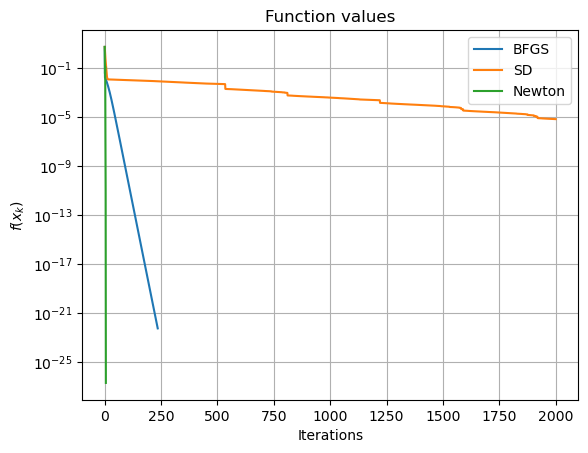

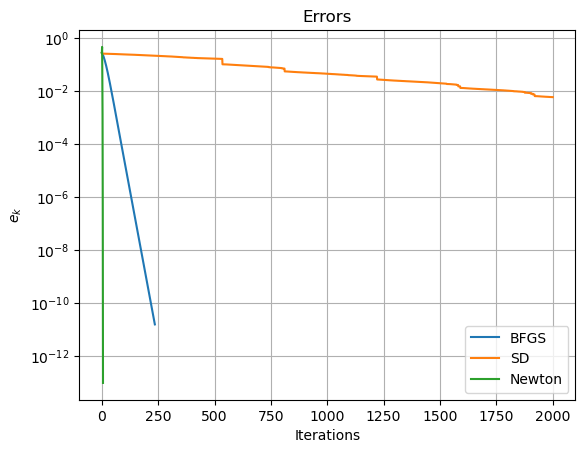

In [13]:
plt.semilogy(range(len(bfgs_x)), bfgs_y)
plt.semilogy(steepest_stats["k"], steepest_stats["fxk"])
plt.semilogy(range(len(newton_stats["F"])), newton_stats["F"])
plt.legend(["BFGS", "SD", "Newton"])
plt.title("Function values")
plt.xlabel("Iterations")
plt.ylabel("$f(x_k)$")
plt.grid()
plt.show()

plt.semilogy(range(len(bfgs_x)), bfgs_e)
plt.semilogy(steepest_stats["k"], steepest_stats["ek"])
plt.semilogy(range(len(newton_stats["F"])), newton_stats["e"])
plt.legend(["BFGS", "SD", "Newton"])
plt.title("Errors")
plt.xlabel("Iterations")
plt.ylabel("$e_k$")
plt.grid()
plt.show()

#plt.plot(range(len(x)), e)
#plt.show()

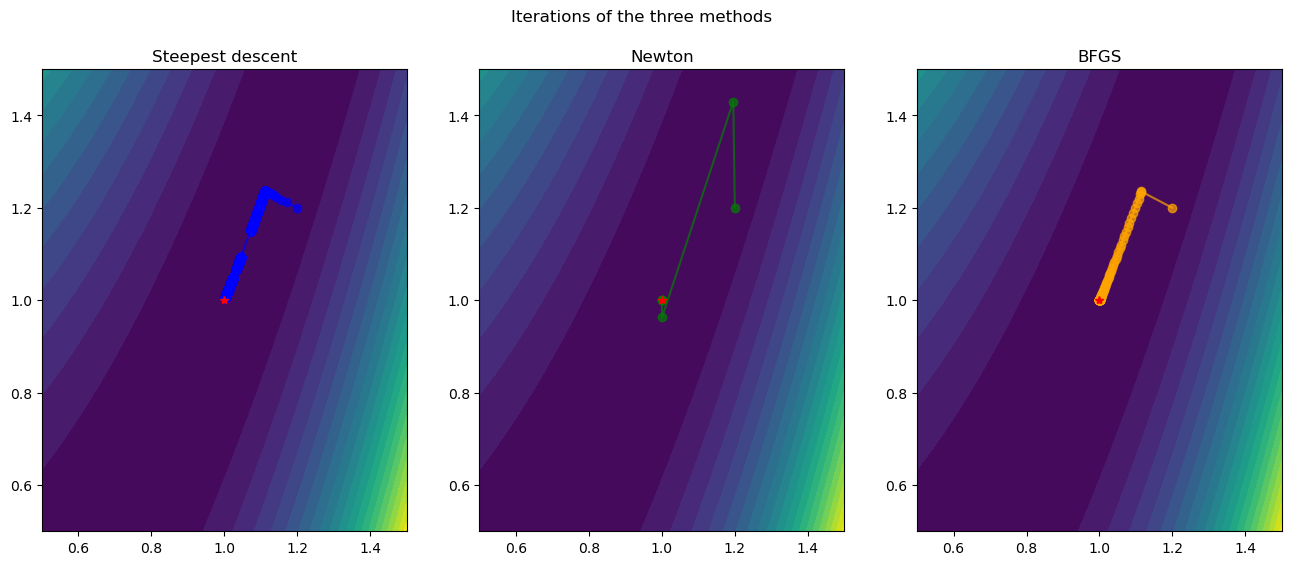

In [14]:
x0 = np.array([1.2,1.2])
fig, axs = plt.subplots(1, 3, figsize=(16,6))
contour(xlim=[0.5, 1.5], ylim=[0.5, 1.5], points=1000, levels=25, log=False, ax=axs[0])
axs[0].plot(np.array(steepest_stats["xk"])[:, 0], np.array(steepest_stats["xk"])[:, 1], 'o-', alpha=0.7, c="blue", label="Steepest descent")

contour(xlim=[0.5, 1.5], ylim=[0.5, 1.5], points=1000, levels=25, log=False, ax=axs[1])
axs[1].plot(np.array(newton_stats["X"])[:, 0], np.array(newton_stats["X"])[:, 1], 'o-', alpha=0.7, c="green", label="Newton")

contour(xlim=[0.5, 1.5], ylim=[0.5, 1.5], points=1000, levels=25, log=False, ax=axs[2])
axs[2].plot(np.array(bfgs_x)[:, 0], np.array(bfgs_x)[:, 1], 'o-', alpha=0.7, c="orange", label="BFGS")

for ax in axs:
    ax.plot(1,1, 'r*')

axs[0].set_title("Steepest descent")
axs[1].set_title("Newton")
axs[2].set_title("BFGS")

fig.suptitle("Iterations of the three methods")

plt.show()